In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] = 'Gulim'

In [416]:
df = pd.read_csv('https://bit.ly/3RhoNho')

In [6]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401682 entries, 0 to 401681
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           401682 non-null  int64  
 1   도서명          401279 non-null  object 
 2   저자           401481 non-null  object 
 3   출판사          396887 non-null  object 
 4   발행년도         401665 non-null  object 
 5   ISBN         401682 non-null  object 
 6   세트 ISBN      61871 non-null   object 
 7   부가기호         325034 non-null  object 
 8   권            68267 non-null   object 
 9   주제분류번호       381360 non-null  object 
 10  도서권수         401682 non-null  int64  
 11  대출건수         401682 non-null  int64  
 12  등록일자         401682 non-null  object 
 13  Unnamed: 13  0 non-null       float64
dtypes: float64(1), int64(3), object(10)
memory usage: 42.9+ MB


,번호,도서권수,대출건수,Unnamed: 13
count,401682.000000,401682.000000,401682.000000,0.0
mean,200841.500000,1.127130,10.954300,NaN
std,115955.749751,0.498039,17.836878,NaN
min,1.000000,0.000000,0.000000,NaN
25%,100421.250000,1.000000,1.000000,NaN
50%,200841.500000,1.000000,5.000000,NaN
75%,301261.750000,1.000000,14.000000,NaN
max,401682.000000,40.000000,1468.000000,NaN


In [417]:
df = df.iloc[:,:-1]

In [9]:
df.shape

(401682, 13)

In [418]:
new_df = df.발행년도.value_counts().reset_index()
new_df.columns = ['발행년도','발행부수']
new_df

,발행년도,발행부수
0,2014,19613
1,2016,19332
2,2012,19284
3,2018,18630
4,2017,18433
...,...,...
395,2011(사실은 2010),1
396,2011[실은2010],1
397,2008(佛紀 2551),1
398,2010.,1


In [419]:
# 년도 4자리만 사용하도록 --> 4자리가 숫자가 아니거나, 4자리를 숫자를 숫자로 변환했을경우 1945이전거랑 2024이후 데이터는 삭제
remove_idx = []
for idx, val in new_df.발행년도.items():
    try:
        result = int(val)
        if result < 1945 or result > 2023:
            remove_idx.append(idx)
    except:
        remove_idx.append(idx)

In [29]:
new_df.drop(remove_idx,0,inplace=True)

In [35]:
new_df.발행년도 = new_df.발행년도.astype(int)

In [38]:
tidy_df = new_df.sort_values(by = '발행년도')

In [40]:
count_by_year = tidy_df.set_index('발행년도')

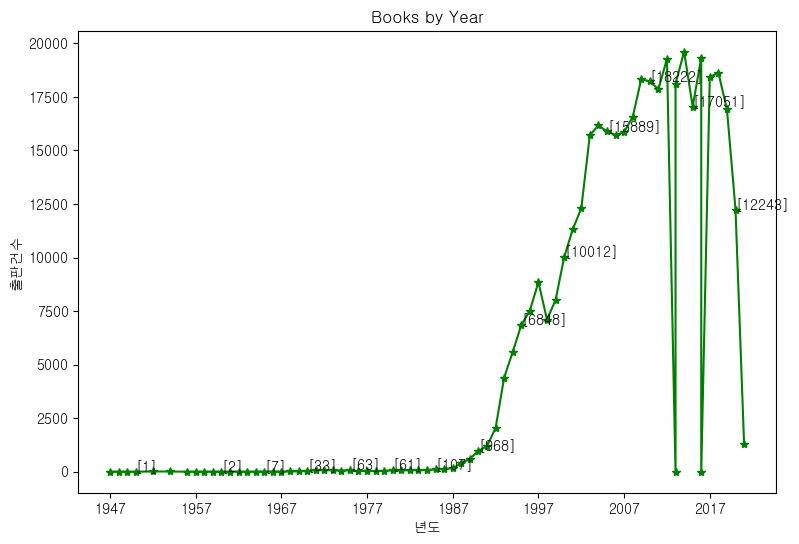

In [51]:
plt.figure(figsize=(9,6))
plt.plot(count_by_year,'*-g')
plt.title("Books by Year")
plt.xlabel("년도")
plt.ylabel("출판건수")
plt.xticks(range(1947,2023,10))
for idx, val in zip(count_by_year.index, count_by_year.values):
    if idx % 5 == 0:
        plt.annotate(val,(idx,val))
plt.show()

In [63]:
new_df = df.copy()

In [65]:
new_df.주제분류번호.fillna('미분류',inplace=True)

In [66]:
new_df = new_df.주제분류번호.str[:1].value_counts().reset_index()

In [67]:
new_df.columns=['주제분류번호','건수']

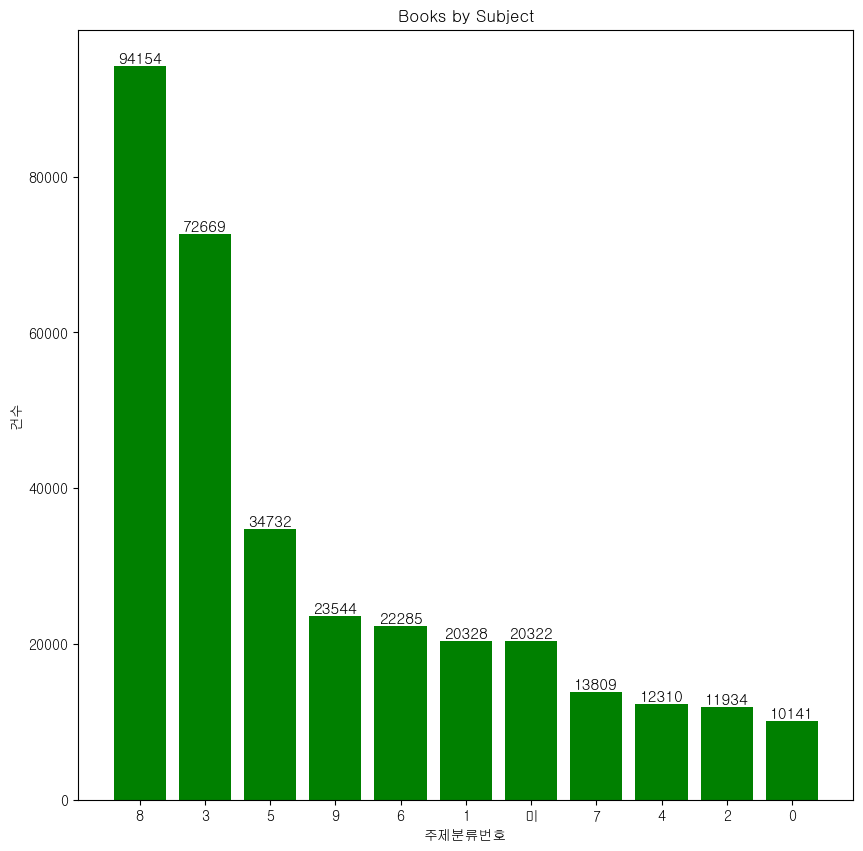

In [94]:
plt.figure(figsize=(10,10))
plt.bar(new_df.주제분류번호,new_df.건수,color='green')
plt.title('Books by Subject')
plt.xlabel('주제분류번호')
plt.ylabel('건수')
for idx, val in zip(new_df.주제분류번호,new_df.건수):
    plt.annotate(val,(idx,val),xytext=(0,2),textcoords='offset points',color='black',ha='center',fontsize=11)
plt.show()

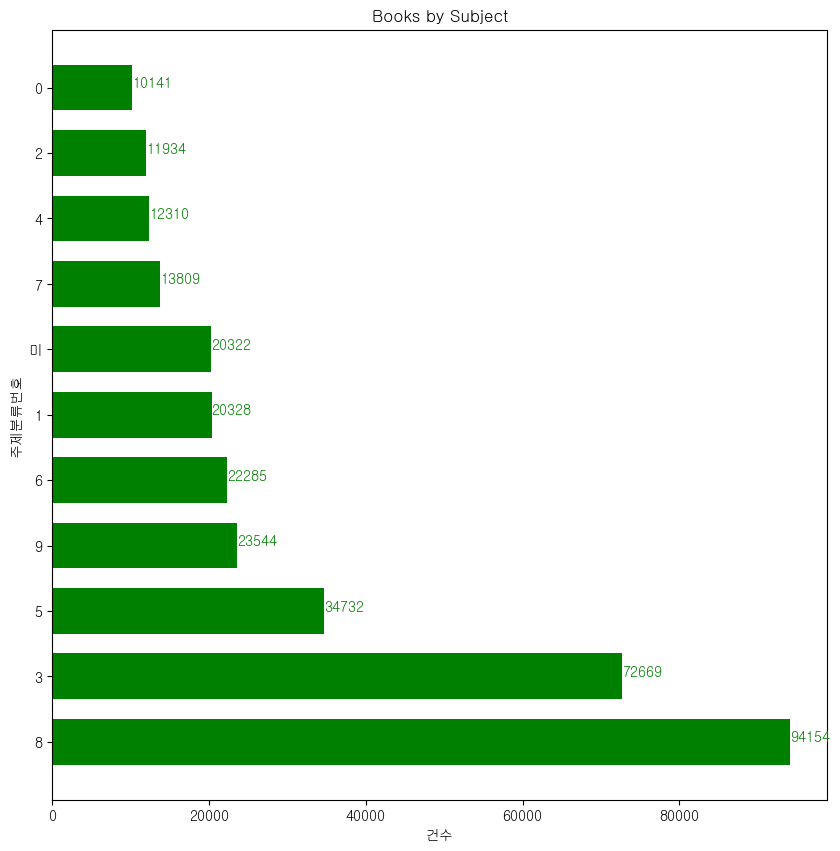

In [122]:
plt.figure(figsize=(10,10))
plt.barh(new_df.주제분류번호,new_df.건수,height=.7,color='green')
plt.title('Books by Subject')
plt.xlabel("건수")
plt.ylabel("주제분류번호")
for idx, val in zip(new_df.주제분류번호,new_df.건수):
    plt.annotate(val,(val,idx),color='green')
plt.savefig('book_subject.png') # 그래프 이미지로 저장
plt.show()

In [107]:
# 이미지 출력하고 저장하기
img = plt.imread('1.jpg')

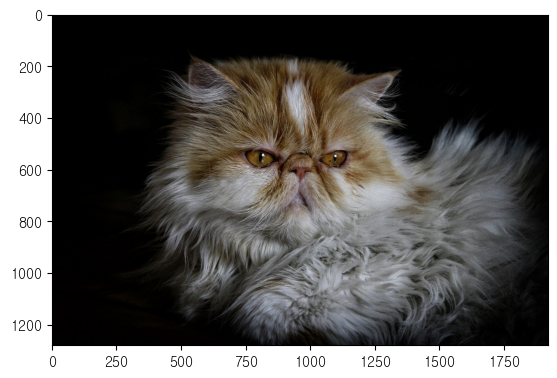

In [110]:
plt.imshow(img)

In [116]:
img1 = img.copy()
img1[:,:,2] = 0

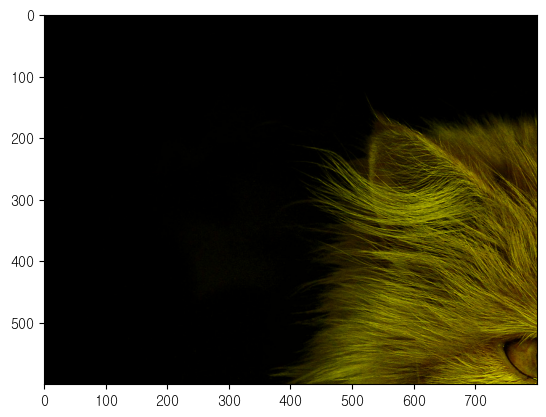

In [119]:
plt.imshow(img1[:600,:800,:])

In [123]:
book_subject = plt.imread('book_subject.png')

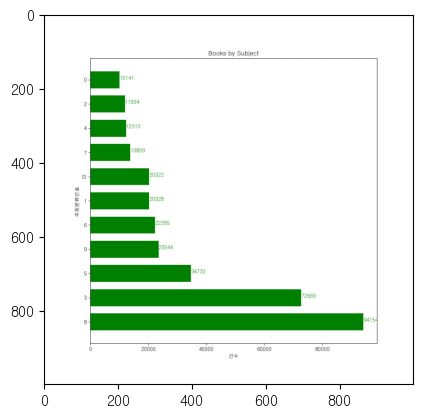

In [124]:
plt.imshow(book_subject)

In [125]:
plt.rcParams['figure.dpi'] = 100 # 해상도 설정

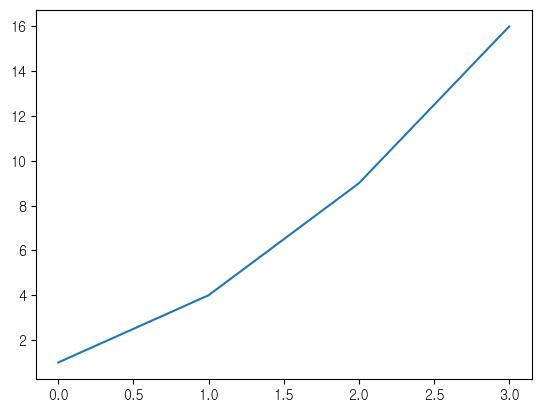

In [126]:
plt.plot(np.arange(1,5)**2)

Text(0, 0.5, 'y-axis')

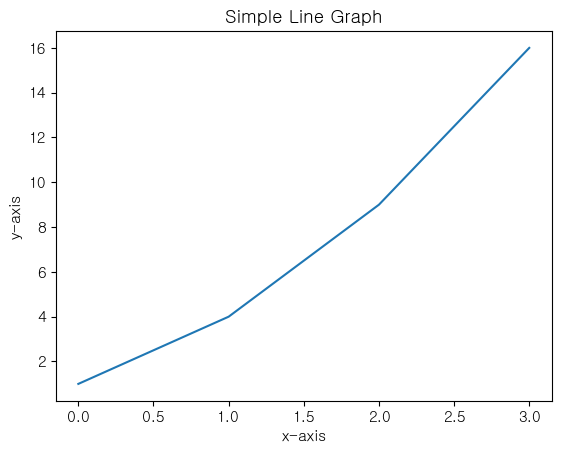

In [130]:
fig, ax = plt.subplots()
ax.plot([1,4,9,16])
ax.set_title('Simple Line Graph')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')

In [129]:
plt.rcParams['font.family'] = 'Gulim'
plt.rcParams['font.size'] = 11

In [131]:
df.columns

Index(['번호', '도서명', '저자', '출판사', '발행년도', 'ISBN', '세트 ISBN', '부가기호', '권',
       '주제분류번호', '도서권수', '대출건수', '등록일자'],
      dtype='object')

In [132]:
##

In [135]:
# df[['출판사','발행년도']].value_counts() # 출판사, 발행년도 합친 값

출판사                  발행년도
웅진씽크빅                2008    495
                     2007    474
창비                   2018    442
민음사                  2014    401
웅진씽크빅                2009    387
                            ... 
대한제과협회               2004      1
                     2003      1
대한전문건설협회 실내건축공사업협의회  2005      1
대한전문건설협회             2005      1
＠nyclass(애니클래스)      2020      1
Length: 78604, dtype: int64

In [136]:
# df.출판사.isna().sum() # na값 확인

4795

In [137]:
# new_df = df.copy()

In [139]:
# new_df = new_df.loc[~new_df.출판사.isna(),:] # na값 지우기

In [142]:
# new_df = new_df[["출판사","발행년도"]].value_counts()

In [144]:
# new_df = new_df.reset_index()

In [146]:
# remove_idx = []
# for idx,val in new_df.발행년도.items():
#     try:
#         if int(val) < 1945 & int(val) > 2023:
#             remove_idx.append(idx)
#     except:
#         remove_idx.append(idx)

In [147]:
# new_df.drop(remove_idx,0,inplace=True)

In [ ]:
## 출판사별 년도별 발행부수 산점도 그리기 (상위 30개 출판사만)

In [149]:
new_df = df.copy()

In [150]:
new_df = new_df.loc[~new_df.출판사.isna(),:]

In [154]:
new_df = new_df.loc[~new_df.발행년도.isna(),:]

In [160]:
# 발행건수가 많은 상위 30개 상위 출판사
top_30 = new_df.출판사.value_counts()[:30].index

In [162]:
new_df = new_df.loc[new_df.출판사.isin(top_30),:]

In [164]:
new_df.index = np.arange(new_df.shape[0])

In [166]:
remove_idx = []
for idx,val in new_df.발행년도.items():
    try:
        if int(val) < 2000 or int(val) > 2023:
            remove_idx.append(idx)
    except:
        remove_idx.append(idx)

In [167]:
new_df.drop(remove_idx,0,inplace=True)

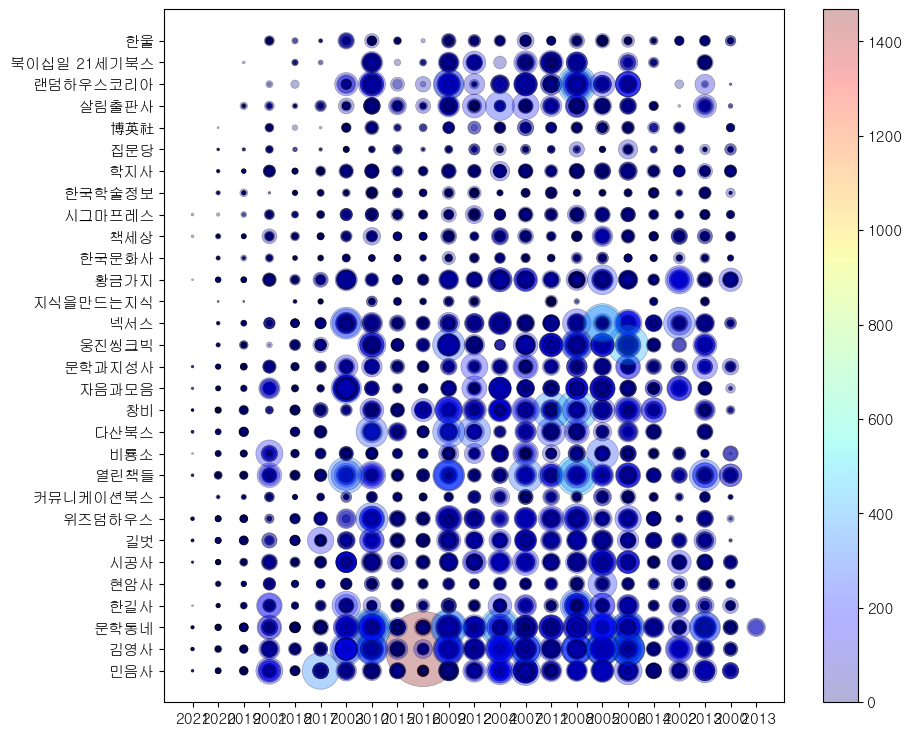

In [183]:
fig, ax = plt.subplots(figsize=(10,9))
sc = ax.scatter(new_df.발행년도,new_df.출판사, s=new_df.대출건수*2,linewidth=0.5,edgecolor='k',c=new_df.대출건수,alpha=0.3,\
          cmap='jet') #마커 크게 만들기 s = 
fig.colorbar(sc)
fig.show()
# 해당년도에 해당 문학사에 발행된 도서의 대출건수가 많으면 크기가 커짐

In [223]:
line1 = df.loc[df.출판사 == '황금가지',:]
line2 = df.loc[df.출판사 == '비룡소',:]

In [224]:
line1[["발행년도","대출건수"]]
line2[["발행년도","대출건수"]]

,발행년도,대출건수
223,2020,0
394,2021,0
1479,2021,1
1906,2020,0
1915,2020,0
...,...,...
397401,1995,0
397503,1995,0
398633,1994,0
400292,2018,0


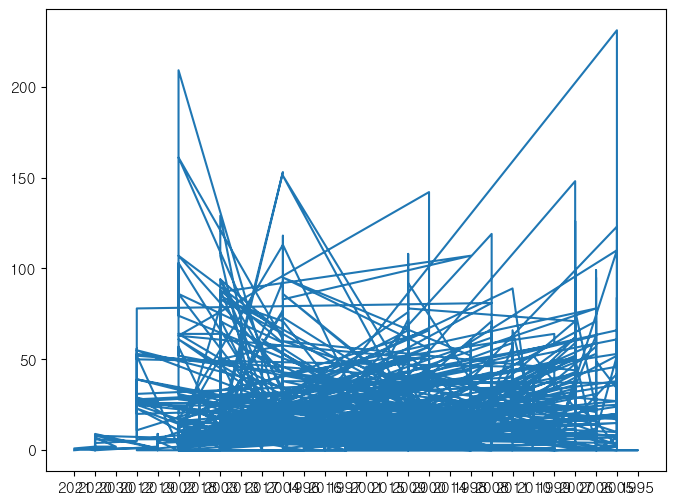

In [185]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(line1.발행년도,line1.대출건수)

In [ ]:
# 1990 ~ 2030년도꺼만 보기

In [225]:
year = np.arange(1990,2030)
year = np.array(year,dtype=str) # 스트링으로 바꿔서

In [226]:
line1 = line1.loc[line1.발행년도.isin(year),:]
line2 = line2.loc[line2.발행년도.isin(year),:]

In [227]:
line1 = line1[["발행년도","대출건수"]]
line2 = line2[["발행년도","대출건수"]]

In [228]:
# 정렬하기
line1 = line1.발행년도.value_counts().sort_index()
line2 = line2.발행년도.value_counts().sort_index()

In [220]:
target = list(set(line2.index) - set(line1.index)) #서로 안겹치는 년도 구하기

In [222]:
# line1에 없는 년도를 line2에서 지우기
line2.drop(target,0,inplace = True)

In [229]:
# line2에만 있는 년도를 line1에 채우기
for i in target:
    line1[i] = 0
line1 = line1.sort_index()

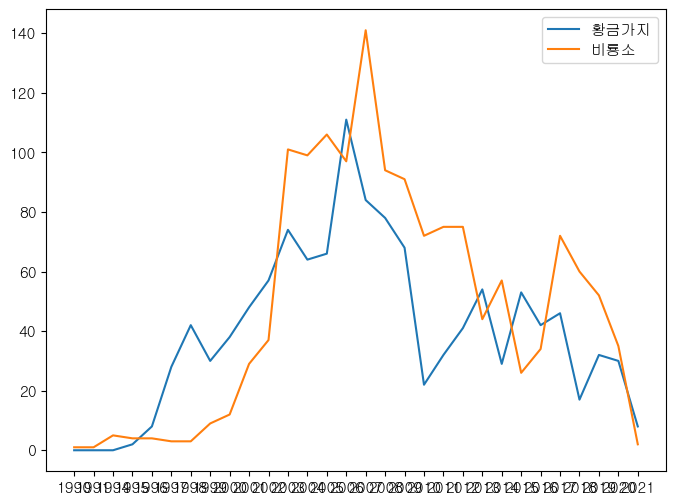

In [231]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(line1,label="황금가지") # 레이블 추가
ax.plot(line2,label="비룡소")
ax.legend() # 범례 추가

In [275]:
# 제일 많이 대출된 출판사 5개 그래프로 그리기
target = df.출판사.value_counts()[:5].index #제일 많이 대출된 출판사 5개

In [276]:
new_df = df.copy() #잘못된 발행년도 제거
remove_idx = []
for idx, val in new_df.발행년도.items():
    try:
        if int(val) < 1990 or int(val) > 2023:
            remove_idx.append(idx)
    except:
        remove_idx.append(idx)
new_df.drop(remove_idx,0,inplace=True)

In [277]:
new_df.발행년도.unique()

array(['2021', '2020', '2018', '2019', '2017', '2015', '2005', '1994',
       '1997', '1995', '2001', '1996', '1999', '2002', '2016', '2012',
       '2007', '2000', '1998', '2004', '2003', '2014', '2010', '2013',
       '2009', '1993', '2006', '1990', '1991', '2011', '2008', '1992',
       ' 2016', ' 2013'], dtype=object)

In [279]:
new_df = new_df.loc[new_df.출판사.isin(target),:] # 제일 많이 대출된 출판사 5개만 따로 저장

In [282]:
new_df = new_df.groupby(['출판사','발행년도']).sum().대출건수.reset_index() # 출판사와 발행년도 별로 묶음

In [294]:
year = new_df.발행년도.unique() # 년도를 안겹치게 따로 변수로 저장

In [407]:
x = ~((new_df.발행년도.isin(year)) & (new_df.출판사 == target[0]))

In [408]:
x

0      True
1      True
2      True
3      True
4      True
       ... 
144    True
145    True
146    True
147    True
148    True
Length: 149, dtype: bool

In [297]:
new_df.발행년도.unique().size

33

In [305]:
new_df1 = new_df.copy()

In [412]:
for i in year: # 0 추가하기    # and(&)는 곱연산, or(|)는 합연산
    for j in target:
        if sum((new_df1.발행년도 == i) & (new_df1.출판사 == j)) < 1: #타겟 출판사 중에서 유니크한 년도가 발행년도 안에 있고
            tmp = pd.DataFrame({'출판사':[j],'발행년도':[i],'대출건수':[0]})
            new_df1 = pd.concat([new_df1,tmp])

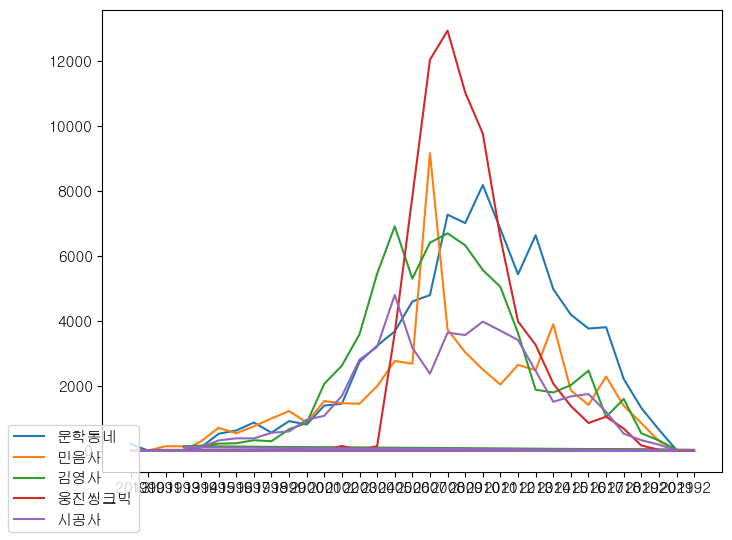

In [347]:
fig, ax = plt.subplots(figsize=(8,6))
for i in target:
    x = new_df1.loc[new_df1.출판사==i,"발행년도"]
    y = new_df1.loc[new_df1.출판사==i,"대출건수"]
    label = i
    ax.plot(x,y,label=label)
fig.legend(loc='lower left') #loc으로 범례의 위치 조절 가능
fig.show()

In [ ]:
# pivot

In [311]:
new_df1.pivot(index=['출판사'],columns=["발행년도"]) #인덱스를 출판사로, 컬럼을 발행년도로

대출건수                                               ...              \
발행년도   2013 1990 1991 1992 1993 1994 1995 1996 1997 1998  ...  2012  2013   
출판사                                                       ...               
김영사       0   16   24   27  135  153  215  227  320  291  ...  3620  1877   
문학동네    205    2    0    0   16  102  520  621  866  554  ...  5434  6639   
민음사       0    2  137    5   12  286  703  534  750  990  ...  2643  2479   
시공사       0    1    0    6  103  101  316  379  377  550  ...  3408  2454   
웅진씽크빅     0    0    0    0    1    0    0    0    0    2  ...  3980  3258   

                                                     
발행년도   2014  2015  2016  2017  2018  2019 2020 2021  
출판사                                                  
김영사    1792  2019  2466  1040  1594   533  316   25  
문학동네   4976  4190  3763  3803  2209  1314  645   18  
민음사    3898  1859  1408  2284  1380   848  294    7  
시공사    1505  1671  1744  1196   523   322  185    5  
웅진씽크빅  2065  1374   853  1045   681   159   26    0  

[5 rows x 33 columns]

In [335]:
date = np.datetime64('2023-01-01 00') + np.arange(1000)
val = np.random.randint(1,10,1000)

In [336]:
df = pd.DataFrame({'date':date,'usage':val})

In [337]:
df['day']=df.date.astype(str).str[:10]
df['hour']=df.date.astype(str).str[11:13]

In [338]:
df.drop(columns=['date'],inplace=True)

In [339]:
df = df[["day","hour","usage"]]

In [341]:
df.pivot(index=["day"],columns=["hour"],values=["usage"]).transpose()

day         2023-01-01  2023-01-02  2023-01-03  2023-01-04  2023-01-05  \
      hour                                                               
usage 00           6.0         9.0         6.0         1.0         8.0   
      01           6.0         2.0         5.0         5.0         3.0   
      02           5.0         1.0         1.0         7.0         5.0   
      03           1.0         7.0         1.0         1.0         3.0   
      04           8.0         9.0         2.0         8.0         8.0   
      05           1.0         1.0         9.0         5.0         8.0   
      06           5.0         5.0         5.0         7.0         8.0   
      07           7.0         1.0         1.0         6.0         6.0   
      08           7.0         1.0         8.0         2.0         6.0   
      09           7.0         4.0         4.0         5.0         5.0   
      10           8.0         6.0         1.0         3.0         6.0   
      11           5.0         3.0         9.0         5.0         4.0   
      12           4.0         1.0         7.0         9.0         3.0   
      13           1.0         5.0         6.0         6.0         4.0   
      14           1.0         9.0         3.0         4.0         5.0   
      15           4.0         2.0         6.0         4.0         7.0   
      16           7.0         8.0         5.0         7.0         4.0   
      17           9.0         6.0         3.0         4.0         8.0   
      18           8.0         4.0         3.0         9.0         3.0   
      19           6.0         5.0         5.0         8.0         7.0   
      20           6.0         6.0         1.0         5.0         4.0   
      21           3.0         8.0         7.0         5.0         5.0   
      22           5.0         8.0         4.0         6.0         7.0   
      23           5.0         5.0         3.0         3.0         5.0   

day         2023-01-06  2023-01-07  2023-01-08  2023-01-09  2023-01-10  ...  \
      hour                                                              ...   
usage 00           3.0         9.0         5.0         1.0         7.0  ...   
      01           4.0         1.0         6.0         6.0         9.0  ...   
      02           2.0         9.0         9.0         4.0         8.0  ...   
      03           4.0         5.0         2.0         9.0         5.0  ...   
      04           6.0         6.0         5.0         8.0         3.0  ...   
      05           6.0         9.0         8.0         5.0         2.0  ...   
      06           1.0         1.0         7.0         5.0         6.0  ...   
      07           7.0         4.0         1.0         4.0         9.0  ...   
      08           8.0         2.0         9.0         7.0         5.0  ...   
      09           7.0         6.0         6.0         6.0         9.0  ...   
      10           6.0         8.0         8.0         7.0         2.0  ...   
      11           9.0         2.0         2.0         4.0         7.0  ...   
      12           1.0         6.0         6.0         5.0         9.0  ...   
      13           8.0         5.0         9.0         5.0         5.0  ...   
      14           9.0         1.0         2.0         8.0         3.0  ...   
      15           9.0         7.0         1.0         5.0         9.0  ...   
      16           6.0         7.0         4.0         8.0         1.0  ...   
      17           7.0         8.0         8.0         6.0         4.0  ...   
      18           6.0         5.0         2.0         9.0         3.0  ...   
      19           9.0         8.0         6.0         8.0         4.0  ...   
      20           1.0         1.0         7.0         5.0         9.0  ...   
      21           5.0         4.0         4.0         8.0         8.0  ...   
      22           2.0         9.0         6.0         1.0         1.0  ...   
      23           6.0         7.0         7.0         1.0         9.0  ...   

day         2023-02-

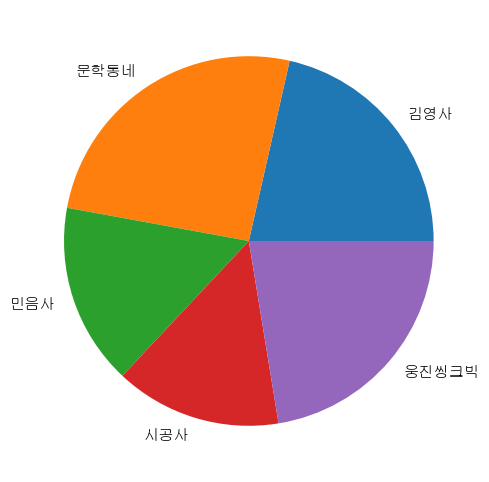

In [345]:
# pie 그래프
label = new_df1.groupby(['출판사']).sum().index
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(new_df1.groupby(['출판사']).sum().대출건수,labels = label)
fig.show()

In [348]:
# 07-1 (page.382)
# z-scale
# 통계관련
x = np.array([0,3,5,7])

In [349]:
(x - x.mean())/x.std()

array([-1.45010473, -0.29002095,  0.48336824,  1.25675744])

In [350]:
from sklearn.preprocessing import StandardScaler

In [354]:
StandardScaler().fit_transform(x.reshape(-1,1)).ravel()

array([-1.45010473, -0.29002095,  0.48336824,  1.25675744])

In [355]:
x.reshape(1,-1)

array([[0, 3, 5, 7]])

In [356]:
from scipy import stats

In [358]:
stats.zscore(x)

array([-1.45010473, -0.29002095,  0.48336824,  1.25675744])

In [361]:
# 중심극한정리
x = np.random.uniform(0,1,10000)

In [363]:
x = stats.chi(1000)

In [370]:
x_chi = np.random.chisquare(10, size=10000)
x_uni = np.random.uniform(0,1,size=10000)

(array([ 6.,  0.,  5.,  5., 10.,  9., 13., 12., 26., 20., 25., 23., 32.,
        31., 36., 37., 43., 44., 38., 45., 45., 36., 45., 54., 43., 40.,
        34., 36., 34., 21., 24., 22., 21., 12., 21., 14.,  9.,  4.,  1.,
         4.,  5.,  3.,  4.,  2.,  1.,  2.,  2.,  0.,  0.,  1.]),
 array([ 7.97361298,  8.0688447 ,  8.16407642,  8.25930813,  8.35453985,
         8.44977157,  8.54500328,  8.640235  ,  8.73546672,  8.83069843,
         8.92593015,  9.02116186,  9.11639358,  9.2116253 ,  9.30685701,
         9.40208873,  9.49732045,  9.59255216,  9.68778388,  9.7830156 ,
         9.87824731,  9.97347903, 10.06871074, 10.16394246, 10.25917418,
        10.35440589, 10.44963761, 10.54486933, 10.64010104, 10.73533276,
        10.83056448, 10.92579619, 11.02102791, 11.11625962, 11.21149134,
        11.30672306, 11.40195477, 11.49718649, 11.59241821, 11.68764992,
        11.78288164, 11.87811335, 11.97334507, 12.06857679, 12.1638085 ,
        12.25904022, 12.35427194, 12.44950365, 12.54473537,

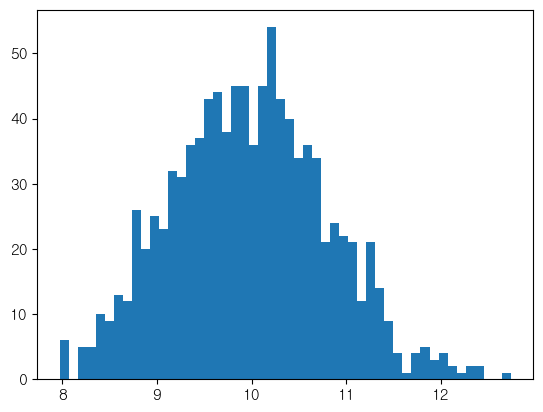

In [374]:
x_chi_sample = []
for _ in range(1000):
    result = np.random.choice(x_chi,30).mean()
    x_chi_sample.append(result)
plt.hist(x_chi_sample,bins=50)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         3.,  2.,  0.,  0.,  1.,  4.,  1.,  1.,  1.,  5.,  3.,  7.,  2.,
         6.,  6., 15.,  7.,  9., 10., 12.,  4., 11., 16., 17., 16., 22.,
        18., 15., 21., 21., 19., 20., 22., 25., 29., 23., 23., 29., 24.,
        20., 15., 24., 26., 33., 29., 21., 25., 21., 23., 20., 24., 16.,
        13., 16., 19., 15., 24., 14., 12., 16., 17.,  8.,  3.,  7., 10.,
         7.,  3.,  6.,  9.,  4.,  3.,  3.,  1.,  1.,  4.,  4.,  2.,  1.,
         2.,  3.,  0.,  0.,  0.,  0.,  0.,  2.,  1.]),
 array([0.31887675, 0.32227941, 0.32568207, 0.32908472, 0.33248738,
        0.33589004, 0.33929269, 0.34269535, 0.34609801, 0.34950066,
        0.35290332, 0.35630598, 0.35970863, 0.36311129, 0.36651395,
        0.3699166 , 0.37331926, 0.37672192, 0.38012457, 0.38352723,
        0.38692988, 0.39033254, 0.3937352 , 0.39713785, 0.40054051,
        0.40394317, 0.40734582, 0.41074848, 0.41415114, 0.41755379,
        0.42095645, 0.4243

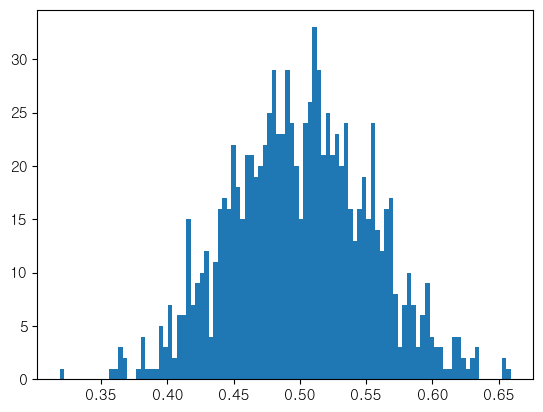

In [379]:
x_uni_sample = []
for _ in range(1000):
    result = np.random.choice(x_uni,30).mean()
    x_uni_sample.append(result)
plt.hist(x_uni_sample,bins=100)

In [392]:
# t- 검정
male = np.random.randint(50,100,1000)
female = np.random.randint(60,100,1000)

In [393]:
male.mean(), female.mean()

(74.911, 79.861)

In [394]:
stats.ttest_ind(male,female)

Ttest_indResult(statistic=-8.591332775416909, pvalue=1.7026104107754483e-17)

In [395]:
# # 07-2 (page.410)
# # 머신러닝
# from sklearn.datasets import load_iris
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

In [401]:
# iris_df = pd.DataFrame(load_iris()['data'],columns=load_iris()['feature_names'])

In [402]:
# iris_df['Species'] = load_iris()['target']

In [403]:
# x = iris_df.iloc[:,:-1]
# y = iris_df.iloc[:,-1]

In [404]:
# x_train, x_test, y_train, y_test = train_test_split(x,y)

In [405]:
# lm.score(x_test,y_test)

NameError: name 'lm' is not defined

In [ ]:
# x_train.shape

In [ ]:
# lm.predict(x_test.iloc[[0],:])